In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

import scienceplots
plt.style.use(['science'])
plt.rcParams.update({'font.size': 30, 'font.family':'sans-serif', 'legend.fontsize':16})


In [21]:
data_set1 = pd.read_excel('MZI.xlsx',usecols= [0,1], header=1, nrows=12)
data_set2 = pd.read_excel('MZI.xlsx',usecols= [0,1], header=17, nrows=12)
data_set3 = pd.read_excel('MZI.xlsx',usecols= [0,1], header=33, nrows=12)
data_set4 = pd.read_excel('MZI.xlsx',usecols= [0,1], header=48, nrows=12)
data_set5 = pd.read_excel('MZI.xlsx',usecols= [0,1], header=63, nrows=12)

In [23]:
data_set1

,Pressure,Fringe Shift
0,6,0
1,30,1
2,50,2
3,76,3
4,100,4
5,124,5
6,150,6
7,172,7
8,190,8
9,214,9


In [24]:
data_sets = np.zeros((5,12,2))
data_sets[0,:,:] = data_set1.to_numpy()
data_sets[1,:,:] = data_set2.to_numpy()
data_sets[2,:,:] = data_set3.to_numpy()
data_sets[3,:,:] = data_set4.to_numpy()
data_sets[4,:,:] = data_set5.to_numpy()

In [45]:
data_sets[0]

array([[  6.,   0.],
       [ 30.,   1.],
       [ 50.,   2.],
       [ 76.,   3.],
       [100.,   4.],
       [124.,   5.],
       [150.,   6.],
       [172.,   7.],
       [190.,   8.],
       [214.,   9.],
       [238.,  10.],
       [266.,  11.]])

In [102]:

def model(x, a, b):
    return a *x +b
params = np.zeros((5,2))
perr = np.zeros((5,2))

for i in range(5):
    xdata = data_sets[i,:,0]
    ydata = data_sets[i,:,1]
    print(xdata, ydata)
    
    popt, pcov = curve_fit(model, xdata, ydata)
    params[i,:] = popt
    perr[i,:] = np.sqrt(np.diag(pcov))
ps = params[:,0]
ps,perr

[  6.  30.  50.  76. 100. 124. 150. 172. 190. 214. 238. 266.] [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[  8.  30.  52.  76. 106. 128. 154. 178. 202. 222. 252. 272.] [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[  6.  32.  58.  84. 110. 132. 156. 184. 208. 232. 258. 290.] [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[  6.  34.  60.  84. 114. 130. 162. 184. 206. 232. 266. 290.] [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[  6.  36.  58.  82. 110. 130. 160. 186. 214. 236. 264. 294.] [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


(array([0.04270762, 0.04104196, 0.03947039, 0.03929725, 0.03870346]),
 array([[0.00035778, 0.05618868],
        [0.00032911, 0.05374607],
        [0.00029109, 0.04949597],
        [0.00045779, 0.07851172],
        [0.00033467, 0.05782481]]))

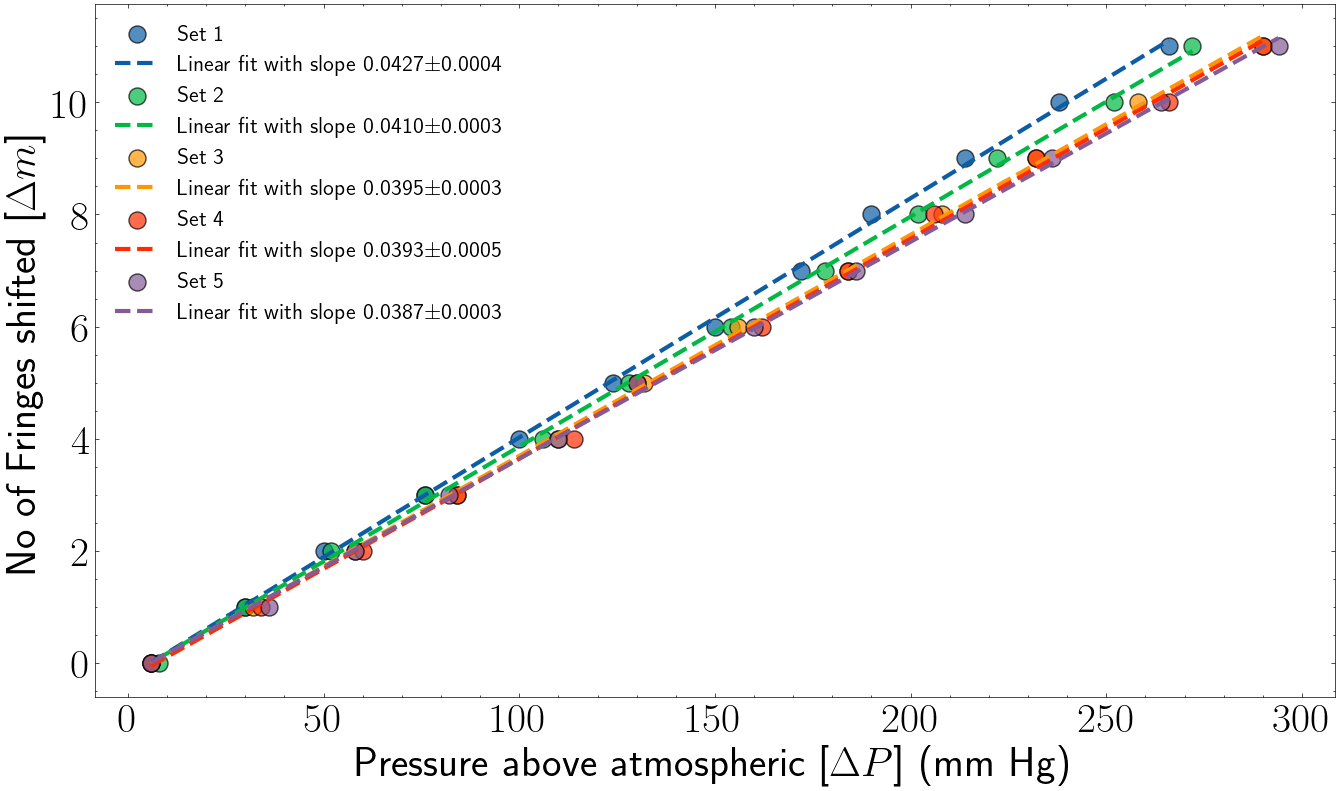

In [120]:
fig, ax = plt.subplots(figsize=(16,9))
for i in range(5):
    ax.scatter(data_sets[i,:,0], data_sets[i,:,1], label=f'Set {i+1}', s=150, alpha=0.7,edgecolor='k')
    ax.plot(data_sets[i,:,0], model(data_sets[i,:,0], *params[i,:]), label=f"Linear fit with slope {params[i,0]:.4f}"+r"$\pm$"+f"{perr[i,0]:.4f}", linestyle='--',lw=3)
ax.legend()
ax.set_xlabel(r'Pressure above atmospheric [$\Delta P$] (mm Hg)')
ax.set_ylabel(r'No of Fringes shifted [$\Delta m$]')
fig.savefig('MZI_plot.svg', bbox_inches='tight',dpi=350)


In [39]:
0.04*760

30.400000000000002

In [41]:
1+(76*11*650*1e-7)/(26*8)

1.00026125

In [54]:
L = 650
P = 760

In [71]:
ref1 = np.zeros(11)
ref2 = np.zeros(11)
ref3 = np.zeros(11)
ref4 = np.zeros(11)
ref5 = np.zeros(11)
shift_data_sets = np.zeros((5,12,2))

for i in range(5):
    shift_data_sets[i,:,0] = data_sets[i,:,0]-data_sets[i,0,0]
    shift_data_sets[i,:,1] = data_sets[i,:,1]

for i in range(1,11):
    ref1[i] = 1 + (P*L*shift_data_sets[0,i,1]*1e-7)/((shift_data_sets[0,i,0])*8)
    ref2[i] = 1 + (P*L*shift_data_sets[1,i,1]*1e-7)/((shift_data_sets[1,i,0])*8)
    ref3[i] = 1 + (P*L*shift_data_sets[2,i,1]*1e-7)/((shift_data_sets[2,i,0])*8)
    ref4[i] = 1 + (P*L*shift_data_sets[3,i,1]*1e-7)/((shift_data_sets[3,i,0])*8)
    ref5[i] = 1 + (P*L*shift_data_sets[4,i,1]*1e-7)/((shift_data_sets[4,i,0])*8)


In [73]:
refind1 = np.array([np.average(ref1[1:]), np.average(ref2[1:]), np.average(ref3[1:]), np.average(ref4[1:]), np.average(ref5[1:])])
refind1

array([1.00026465, 1.00026186, 1.00024204, 1.00023752, 1.00023728])

In [52]:
shift_data_sets

array([[[  0.,   0.],
        [ 24.,   1.],
        [ 44.,   2.],
        [ 70.,   3.],
        [ 94.,   4.],
        [118.,   5.],
        [144.,   6.],
        [166.,   7.],
        [184.,   8.],
        [208.,   9.],
        [232.,  10.],
        [260.,  11.]],

       [[  0.,   0.],
        [ 22.,   1.],
        [ 44.,   2.],
        [ 68.,   3.],
        [ 98.,   4.],
        [120.,   5.],
        [146.,   6.],
        [170.,   7.],
        [194.,   8.],
        [214.,   9.],
        [244.,  10.],
        [264.,  11.]],

       [[  0.,   0.],
        [ 26.,   1.],
        [ 52.,   2.],
        [ 78.,   3.],
        [104.,   4.],
        [126.,   5.],
        [150.,   6.],
        [178.,   7.],
        [202.,   8.],
        [226.,   9.],
        [252.,  10.],
        [284.,  11.]],

       [[  0.,   0.],
        [ 28.,   1.],
        [ 54.,   2.],
        [ 78.,   3.],
        [108.,   4.],
        [124.,   5.],
        [156.,   6.],
        [178.,   7.],
        [200.,   8.],
    

In [62]:
650/16

40.625

In [66]:
(0.04*760*650*1e-7)/8

0.000247

In [109]:
refind = 1+(ps*P*L*1e-7)/(8)
errrefind = (perr[:,0]*P*L*1e-7)/8
errrefind1 = (ps*P*L*1e-7)/(8*8)*0.1
errrefind2 = (ps*2*L*1e-7)/(8)

In [74]:
refind,refind1

(array([1.00026372, 1.00025343, 1.00024373, 1.00024266, 1.00023899]),
 array([1.00026465, 1.00026186, 1.00024204, 1.00023752, 1.00023728]))

In [110]:
for i in range(5):
    print(f"[Set {i+1}],[{refind[i]:.6f}],[{errrefind[i]+errrefind1[i]+errrefind2[i]:.6f}],")

[Set 1],[1.000264],[0.000006],
[Set 2],[1.000253],[0.000006],
[Set 3],[1.000244],[0.000005],
[Set 4],[1.000243],[0.000006],
[Set 5],[1.000239],[0.000006],


In [117]:
avgref = 0
for i in range(5):
    avgref += refind[i]*1/( (errrefind[i]+errrefind1[i]+errrefind2[i]) )
avgref = avgref/( np.sum(1/(errrefind+errrefind1+errrefind2)) )
avgref

np.float64(1.0002483280355368)

In [118]:
np.average(errrefind+errrefind1+errrefind2 )

np.float64(5.94679691287131e-06)

In [119]:
print(f"Average Refractive Index of Air: [{avgref:.6f}] ± [{np.average(errrefind+errrefind1+errrefind2 ): .6f}]")

Average Refractive Index of Air: [1.000248] ± [ 0.000006]
